# The Spectroscopy
25.05.20 AstroLab


작성자: Seungwu Yoo, Taewan Kim

## README

This notebook consists of three types of code cells:

The [Advanced] sections are dedicated to those who wish to further pursue and deeply study astronomy.

- [Mission]: Sections where you directly modify and manipulate values for practice.


- [Auto]: Sections that are not essential to manipulate for practice but are easy to understand.


- [Advanced]: Background information provided for practice; sections that you can execute without needing to fully understand or manipulate.

The [Advanced] sections are dedicated to those who wish to further pursue and deeply study astronomy.

### [Auto] Import the package

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.io.fits as fits
from astropy import units as u

### [Auto] Adjust rcParams

In [3]:
plt.rcParams["font.family"] = 'STIXGeneral'
plt.rcParams['text.usetex'] = False
plt.rcParams["mathtext.fontset"] = 'cm'
plt.rcParams["axes.labelweight"] = "bold"

plt.rcParams.update({'font.size': 40})
plt.rcParams.update({'font.weight': 'normal'})

plt.rcParams.update({'xtick.direction': 'in'})
plt.rcParams.update({'ytick.direction': 'in'})
plt.rcParams.update({'xtick.major.size': 20})
plt.rcParams.update({'xtick.minor.size': 12})
plt.rcParams.update({'ytick.major.size': 20})
plt.rcParams.update({'ytick.minor.size': 12})
plt.rcParams.update({'xtick.major.width': 2})
plt.rcParams.update({'xtick.minor.width': 2})
plt.rcParams.update({'ytick.major.width': 2})
plt.rcParams.update({'ytick.minor.width': 2})
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'axes.linewidth': 4})
plt.rcParams.update({'axes.labelpad': 4})
plt.rcParams.update({'xtick.major.pad': 20})
plt.rcParams.update({'ytick.major.pad': 12})
plt.rcParams.update({'image.origin':'lower'})

### [Advanced] Retrieving Spectra from SDSS

- SDSS (Sloan Digital Sky Survey): https://www.sdss.org/

- You can obtain the FITS file of a spectrum using the plate, MJD, and fiberID.

- These parameters (plate, MJD, fiberID) can be identified directly by selecting a fiber in the SDSS Navigator: https://skyserver.sdss.org/dr16/en/tools/chart/navi.aspx

- Alternatively, you can use the SDSS.query_region function in Python to retrieve the spectrum by specifying the RA and DEC of the target.

Text(0.5, 1.0, 'plate=1771, mjd=53498, fiberID=75')

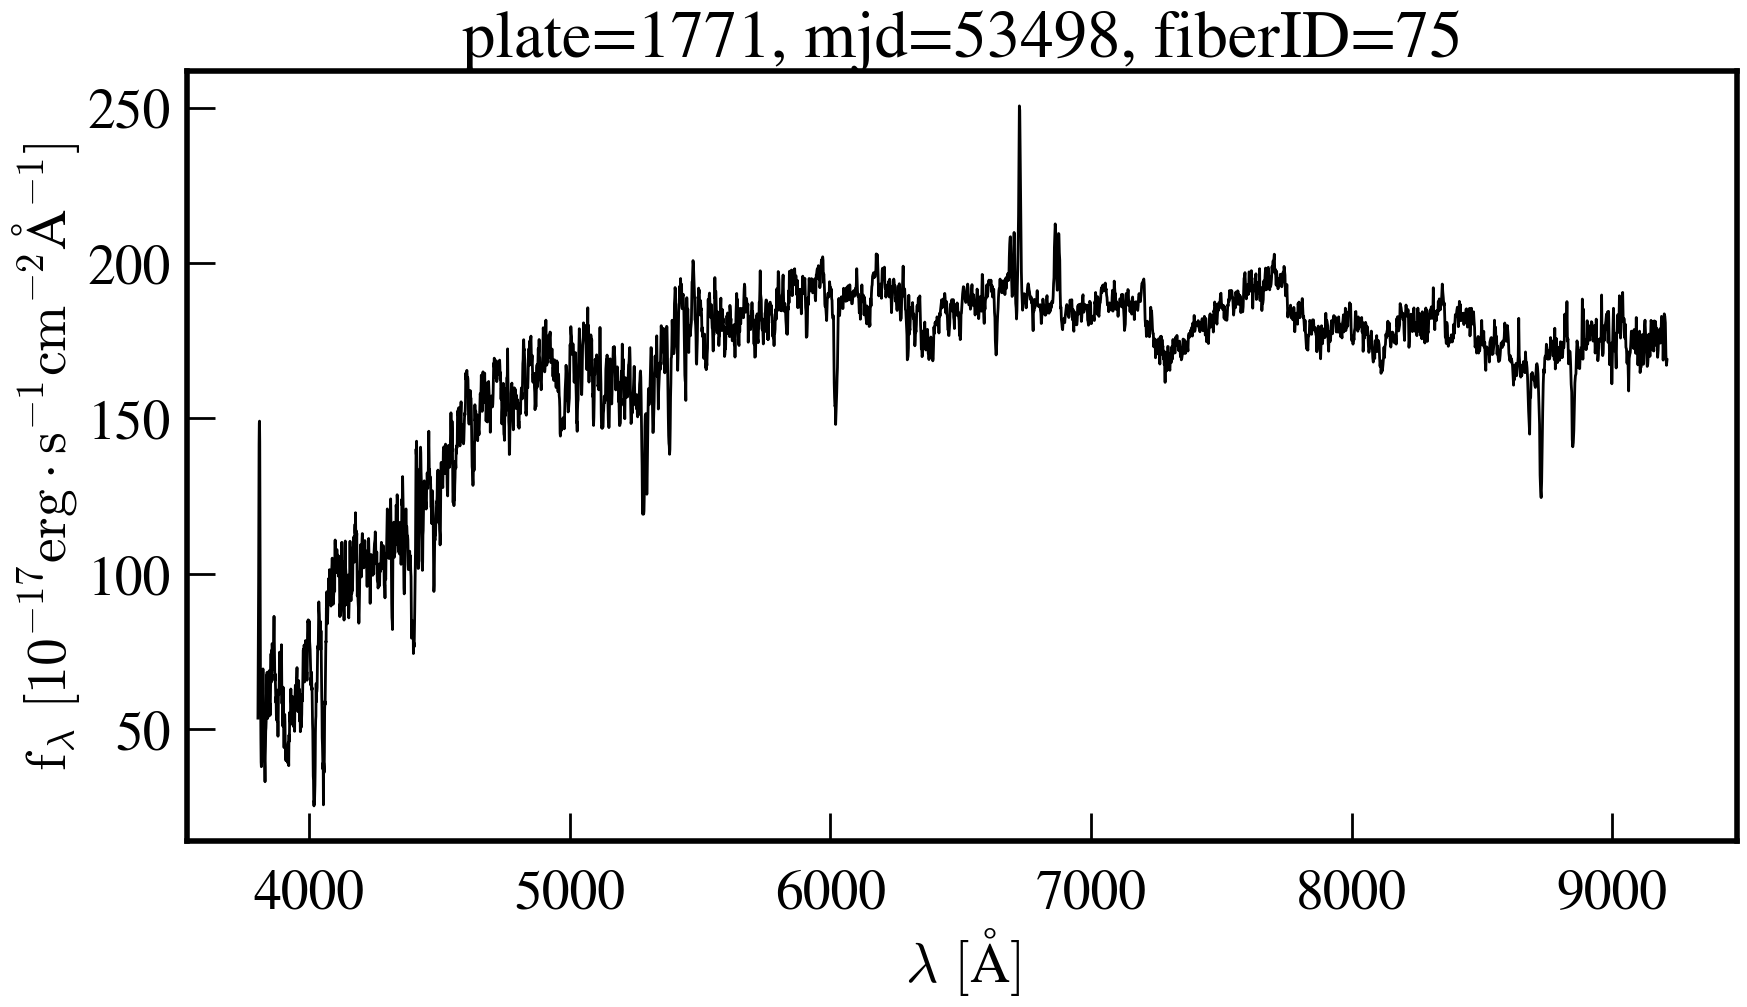

In [4]:
plate, mjd, fiberid = 1771, 53498, 75

sp = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiberid)[0]
#sp.writeto(f'{plate}_{mjd}_{fiberid}.fits', overwrite=True) - if you want to save the file

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(10 ** sp[1].data['loglam'], sp[1].data['flux'], c='k')

ax.set_xlabel('$\mathrm{\lambda\ [\AA]}$')
ax.set_ylabel('$\mathrm{f_\lambda\ [10^{-17}erg\cdot s^{-1}cm^{-2}\AA^{-1}]}$')
ax.set_title(f'plate={plate}, mjd={mjd}, fiberID={fiberid}')

Text(0.5, 1.0, 'plate=1771, mjd=53498, fiberID=75')

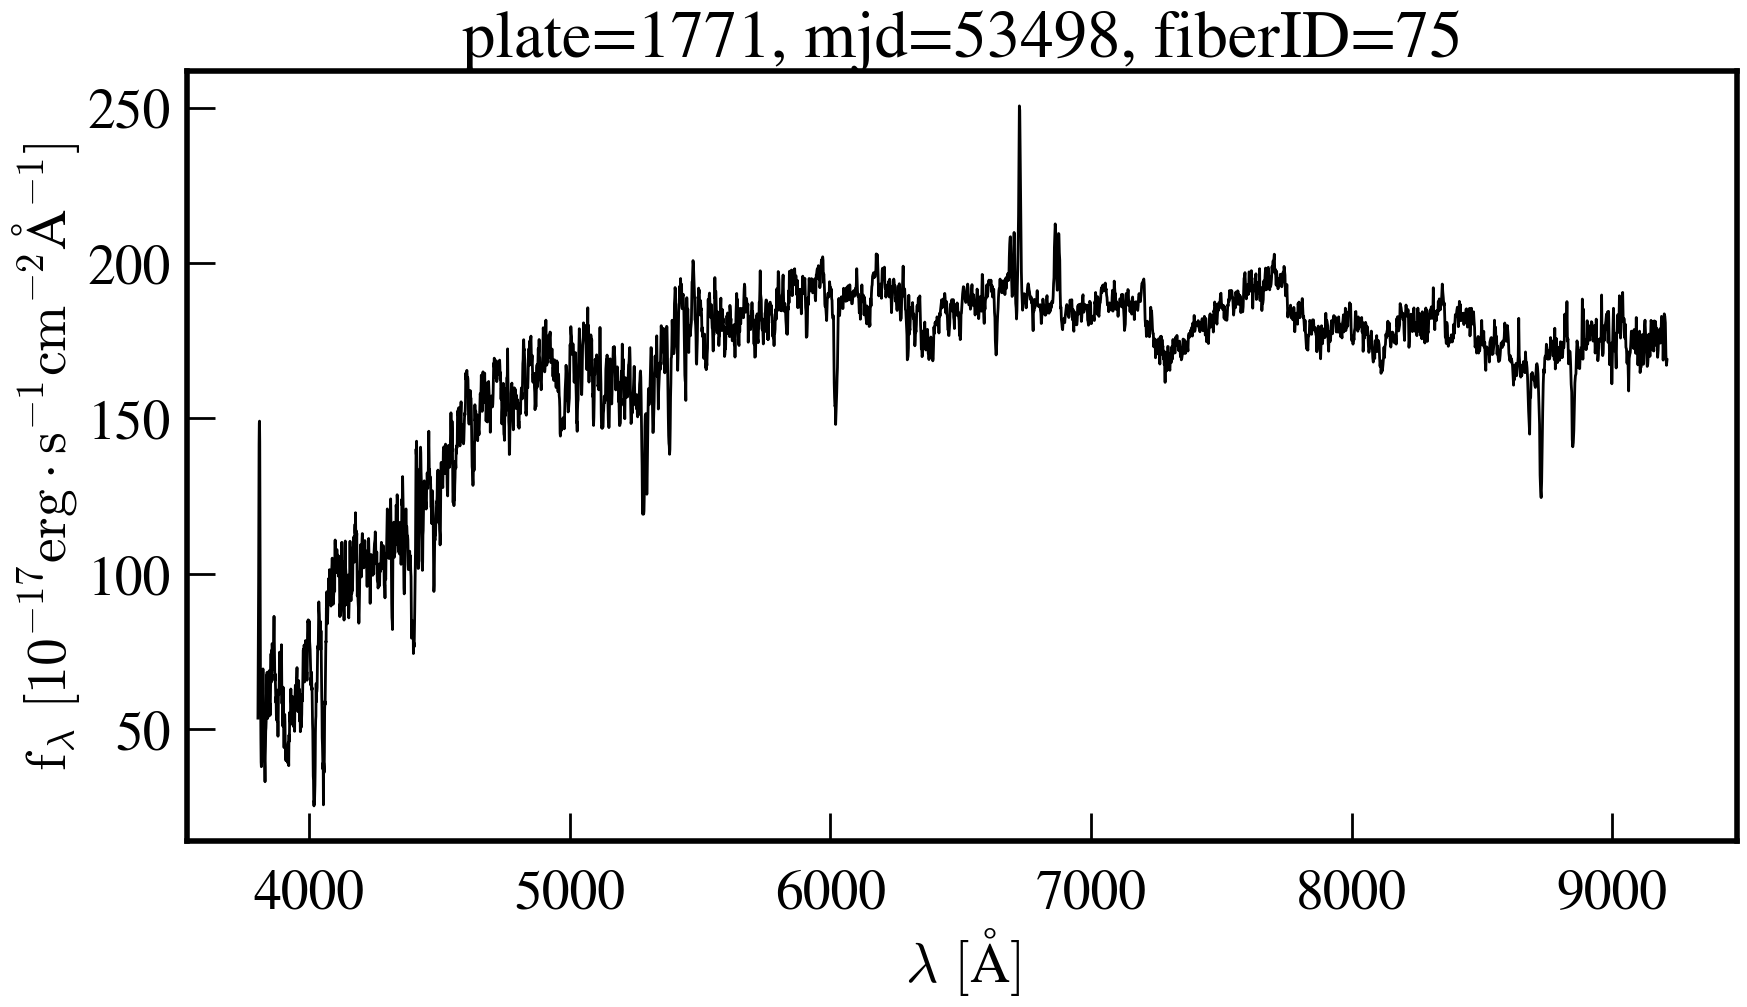

In [5]:
ra, dec = 195.83, 14.38
coord = coords.SkyCoord(ra, dec, unit="deg", frame='icrs')
xid = SDSS.query_region(coord, spectro=True, radius=1*u.arcmin, photoobj_fields=['r', 'objid'],
                            specobj_fields=['ra', 'dec', 'plate', 'mjd', 'fiberID'], timeout=300)

plate, mjd, fiberid = xid['plate'][0], xid['mjd'][0], xid['fiberID'][0]

sp = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiberid)[0]
#sp.writeto(f'{plate}_{mjd}_{fiberid}.fits', overwrite=True) - if you want to save the file

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(10 ** sp[1].data['loglam'], sp[1].data['flux'], c='k')

ax.set_xlabel('$\mathrm{\lambda\ [\AA]}$')
ax.set_ylabel('$\mathrm{f_\lambda\ [10^{-17}erg\cdot s^{-1}cm^{-2}\AA^{-1}]}$')
ax.set_title(f'plate={plate}, mjd={mjd}, fiberID={fiberid}')

### [Auto] Load the spectrum data

In [6]:
spec = {}
for i in range(20):
    spec[i] = pd.read_csv(f'./spectrum/spec{i}.txt', sep=' ')

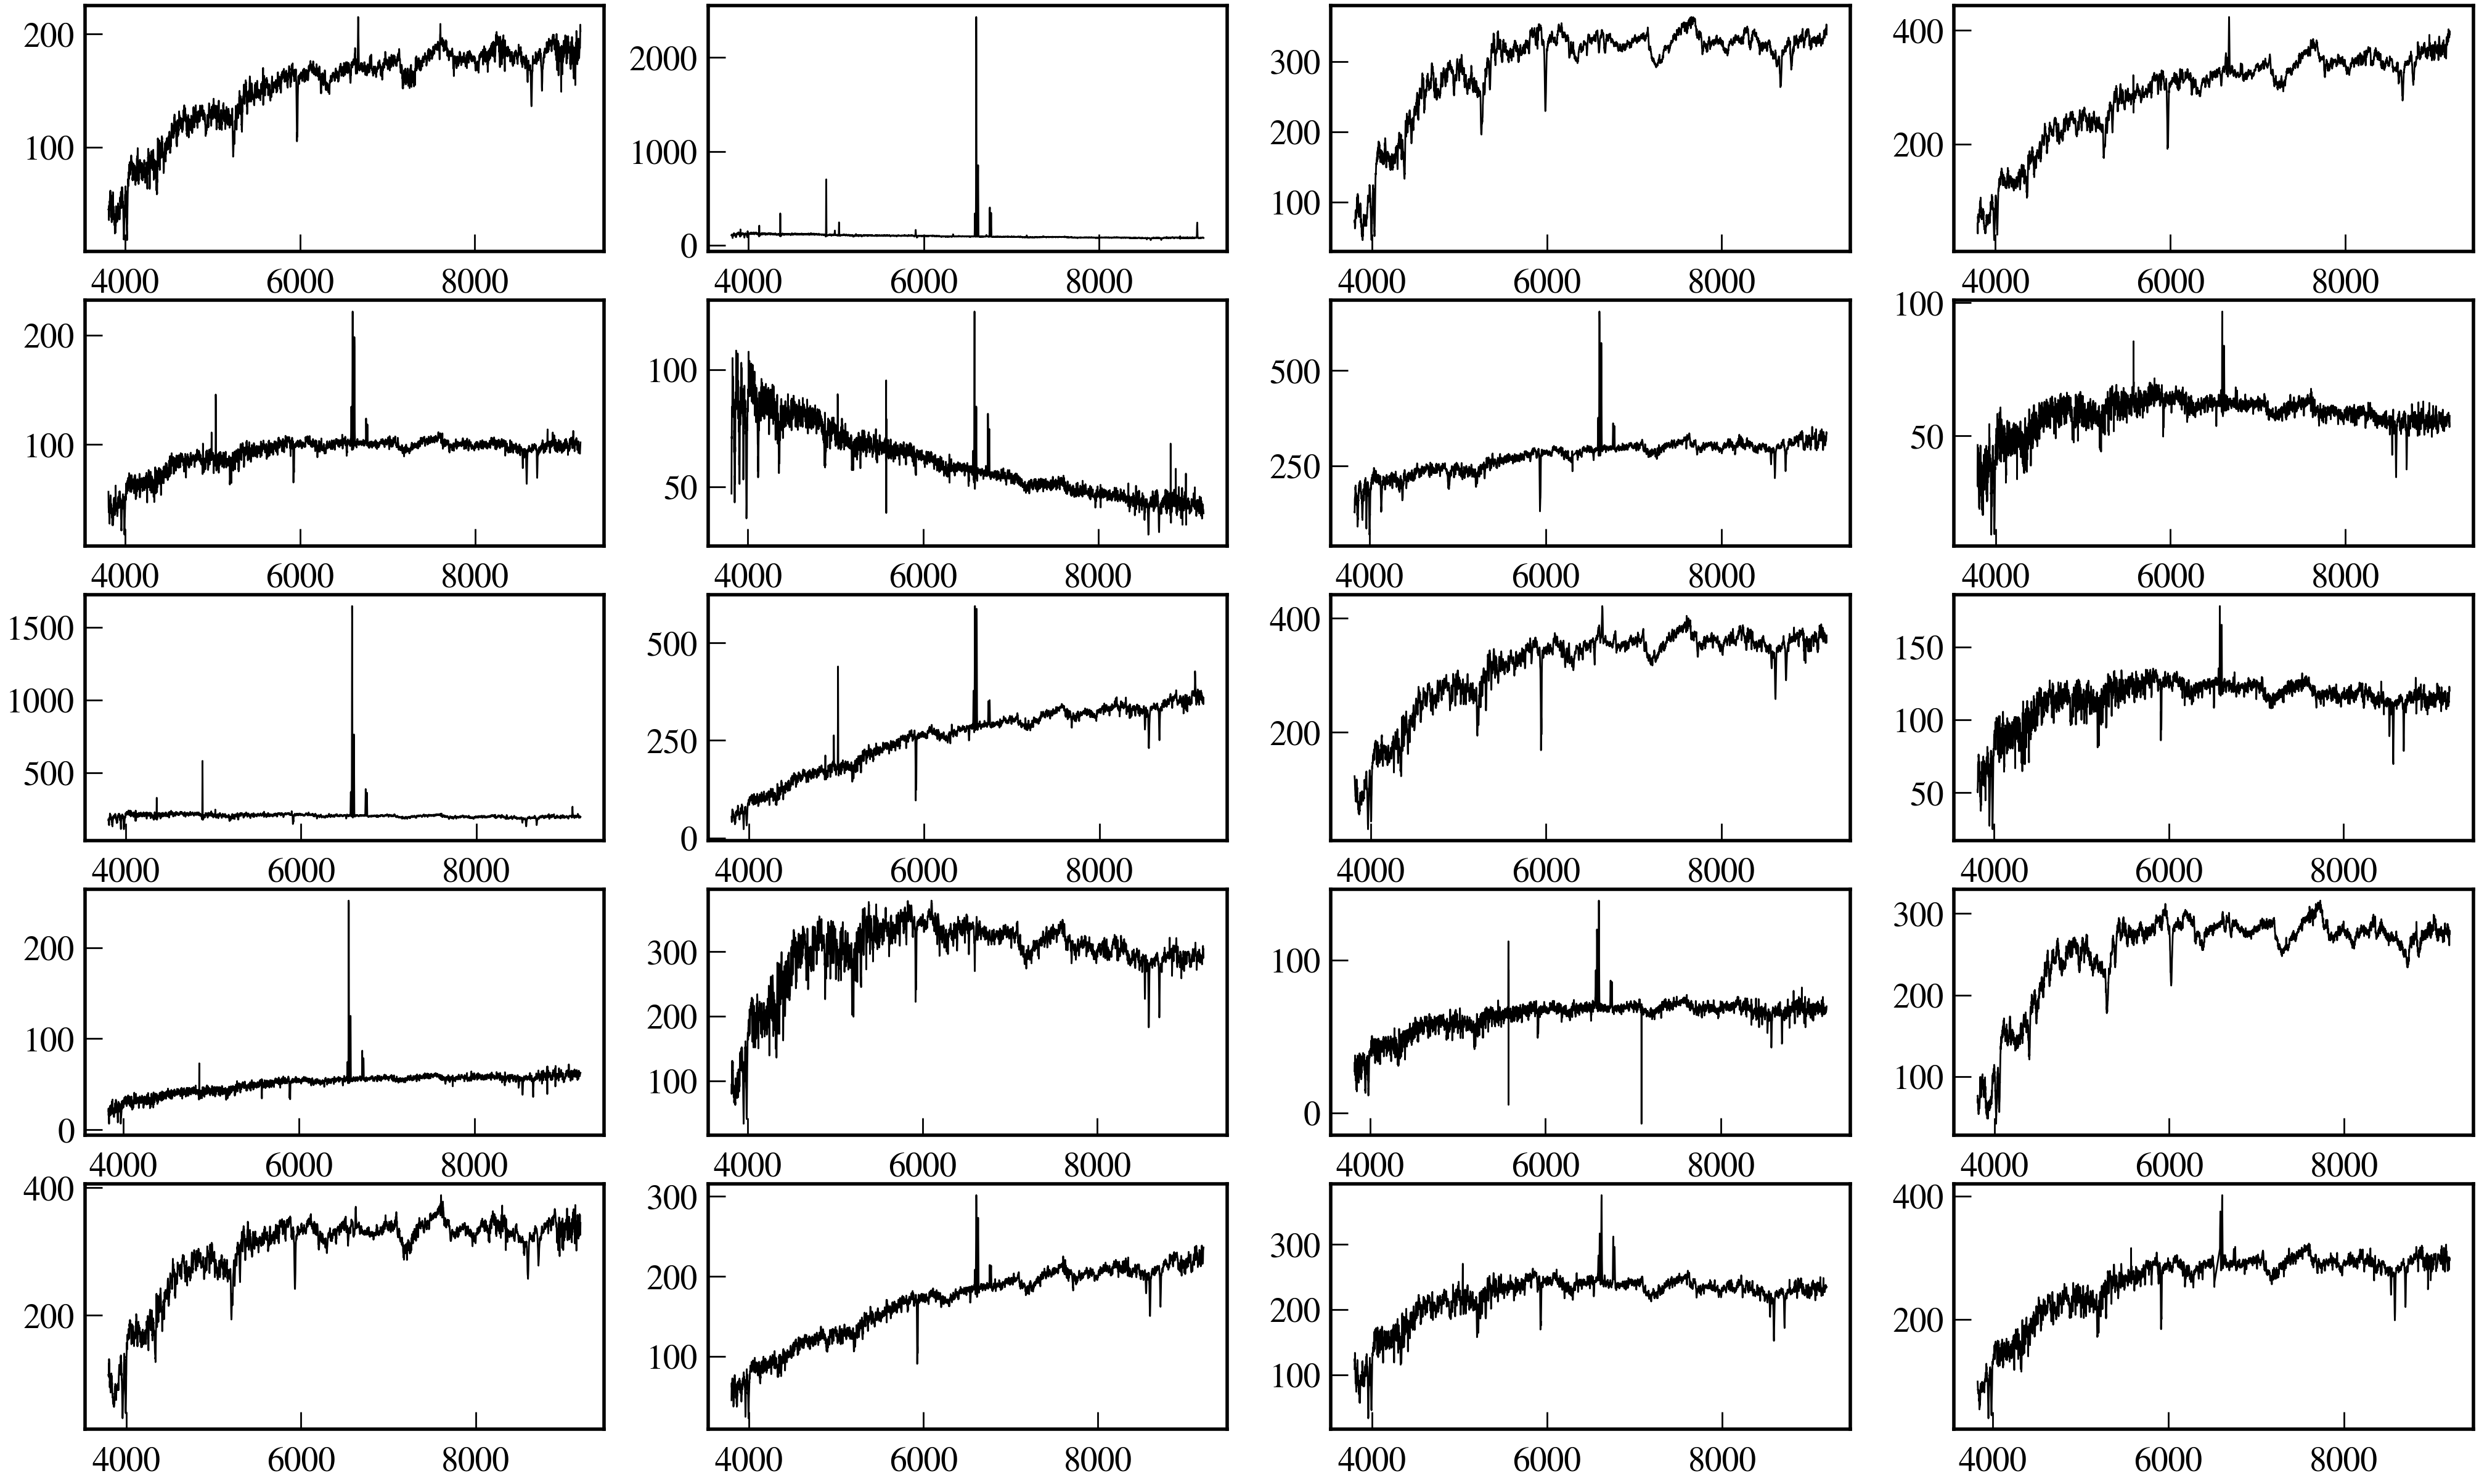

In [7]:
fig, axes = plt.subplots(5, 4, figsize=(50, 30))

for i in range(20):
    axes[i//4][i%4].plot(spec[i]['lamb'], spec[i]['flux'], c='k')

### [Mission] Determine the Redshift of Each Galaxy

- Use a specific spectral line to determine the redshift of each galaxy.

- $z = \frac{\lambda_{\mathrm{obs}} - \lambda_{0}}{\lambda_{0}}$

- Fraunhofer lines: https://en.wikipedia.org/wiki/Fraunhofer_lines

- Balmer series: https://en.wikipedia.org/wiki/Balmer_series

In [9]:
k0 = 3934.777               # Reference Ca II K line
h0 = 3969.588               # Reference Ca II H line
halpha0 = 6564.61           # Reference H alpha line

Ca II H line: z=0.013, Ca II K line: z=0.009, H alpha line: z=0.008


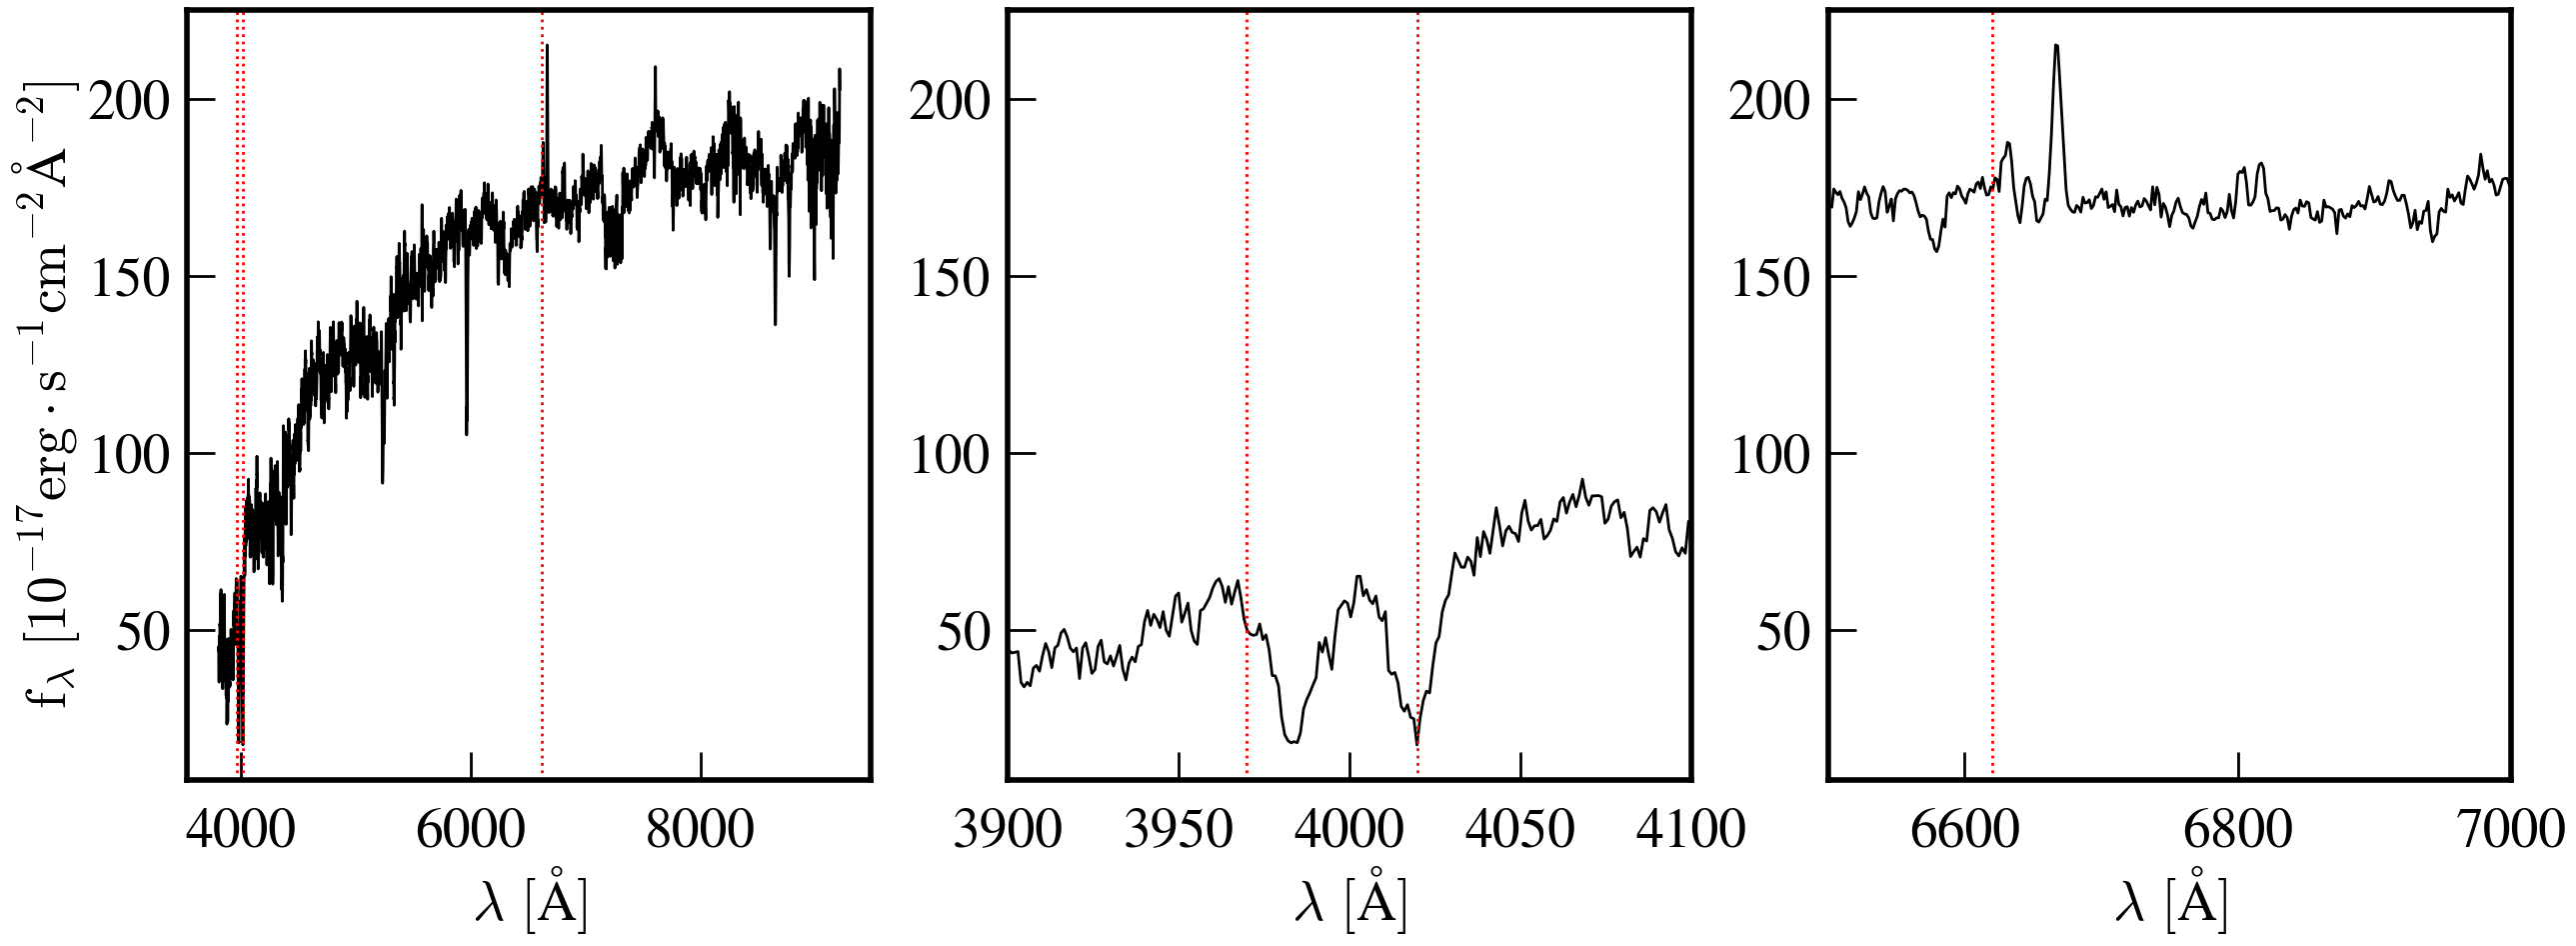

In [10]:
k_obs = 3970                # You should fix this   (Observed Ca II K line)
h_obs = 4020                # You should fix this   (Observed Ca II H line)
halpha_obs = 6620           # You should fix this   (Observed H alpha line)
n = 0                       # The index of spectrum (0 ~ 19)

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

axes[0].plot(spec[n]['lamb'], spec[n]['flux'], c='k')
axes[0].set_xlabel('$\mathrm{\lambda\ [\AA]}$')
axes[0].set_ylabel('$\mathrm{f_\lambda\ [10^{-17}erg\cdot s^{-1}cm^{-2}\AA^{-2}]}$')
axes[0].axvline(h_obs, color='red', linestyle=':')
axes[0].axvline(k_obs, color='red', linestyle=':')
axes[0].axvline(halpha_obs, color='red', linestyle=':')

axes[1].plot(spec[n]['lamb'], spec[n]['flux'], c='k')
axes[1].set_xlim(3900, 4100)
axes[1].set_xlabel('$\mathrm{\lambda\ [\AA]}$')
axes[1].axvline(h_obs, color='red', linestyle=':')
axes[1].axvline(k_obs, color='red', linestyle=':')

axes[2].plot(spec[n]['lamb'], spec[n]['flux'], c='k')
axes[2].set_xlim(6500, 7000)
axes[2].set_xlabel('$\mathrm{\lambda\ [\AA]}$')
axes[2].axvline(halpha_obs, color='red', linestyle=':')

z_h = round((h_obs - h0)/h0, 3)
z_k = round((k_obs - k0)/k0, 3)
z_ha = round((halpha_obs - halpha0)/halpha0, 3)

print(f'Ca II H line: z={z_h}, Ca II K line: z={z_k}, H alpha line: z={z_ha}')